In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Experimento 1

Datos:

100000 -> training

&nbsp; 20000 -> validation
 
&nbsp; 20000 -> test

Se fija los 100k como datos no anotados y:

a) Se utiliza 25% de datos de training anotados.

b) Se utiliza 50% de datos de training anotados.

c) Se utiliza 75% de datos de training anotados.

d) Se utiliza 100% de datos de training anotados.

In [36]:
results = pd.read_csv('../models/experiments/results_cnn_ladder_exp_1.csv')

In [48]:
results.head()

,experiment,split,epoch,accuracy,lloss,true,pred
0,exp_1_a_cnn_ladder,training,1,0.608,1.08,3,3
1,exp_1_a_cnn_ladder,training,1,0.608,1.08,3,3
2,exp_1_a_cnn_ladder,training,1,0.608,1.08,3,2
3,exp_1_a_cnn_ladder,training,1,0.608,1.08,1,1
4,exp_1_a_cnn_ladder,training,1,0.608,1.08,1,2


In [40]:
exp_names = results.experiment.unique()
exp_names

array(['exp_1_a_cnn_ladder', 'exp_1_b_cnn_ladder', 'exp_1_c_cnn_ladder',
       'exp_1_d_cnn_ladder'], dtype=object)

In [41]:
exp_1_a_cnn_ladder = results[results.experiment == exp_names[0]]
exp_1_b_cnn_ladder = results[results.experiment == exp_names[1]]
exp_1_c_cnn_ladder = results[results.experiment == exp_names[2]]
exp_1_d_cnn_ladder = results[results.experiment == exp_names[3]]

### Experimento 1 a)

In [43]:
split_group = exp_1_a_cnn_ladder.groupby('split')
split_group.accuracy.describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,20000.0,0.543906,0.116030,0.193,0.504,0.585,0.605,0.648
training,500000.0,0.635338,0.017906,0.568,0.625,0.636,0.647,0.696
validation,400000.0,0.579446,0.042029,0.407,0.557,0.578,0.603,0.665


### Experimento 1 b)

In [44]:
split_group = exp_1_b_cnn_ladder.groupby('split')
split_group.accuracy.describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,20000.0,0.664432,0.042503,0.529,0.654,0.668,0.701,0.713
training,922280.0,0.668796,0.022398,0.441,0.657,0.672,0.684,0.765
validation,400000.0,0.661866,0.027850,0.590,0.642,0.664,0.684,0.729


### Experimento 1 c)

In [45]:
split_group = exp_1_c_cnn_ladder.groupby('split')
split_group.accuracy.describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,20000.0,0.675898,0.040569,0.553,0.656,0.680,0.710,0.733
training,1161260.0,0.660827,0.019480,0.587,0.648,0.662,0.675,0.708
validation,400000.0,0.673795,0.023705,0.568,0.660,0.674,0.688,0.729


### Experimento 1 d)

In [46]:
split_group = exp_1_d_cnn_ladder.groupby('split')
split_group.accuracy.describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,20000.0,0.640008,0.046708,0.520,0.606,0.657,0.674,0.699
training,1309840.0,0.588331,0.041039,0.384,0.584,0.597,0.608,0.648
validation,400000.0,0.631340,0.049608,0.383,0.622,0.639,0.653,0.714


/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

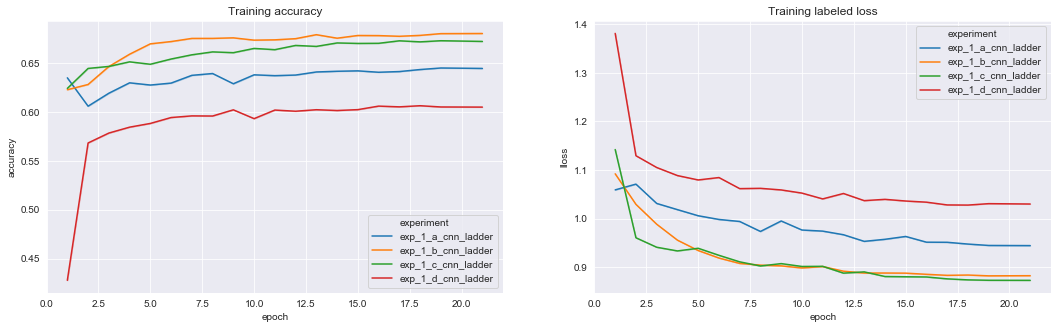

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
sns.set_style('darkgrid')
ax_acc = sns.lineplot(x='epoch', y='accuracy', hue='experiment', 
                      data=results[results.split == 'training'], ax=ax[0])
ax_acc.set_title('Training accuracy')
ax_acc.plot()
ax_l = sns.lineplot(x='epoch', y='lloss', hue='experiment', 
                    data=results[results.split == 'training'], ax=ax[1])
ax_l.set_title('Training labeled loss')
ax_l.plot()

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

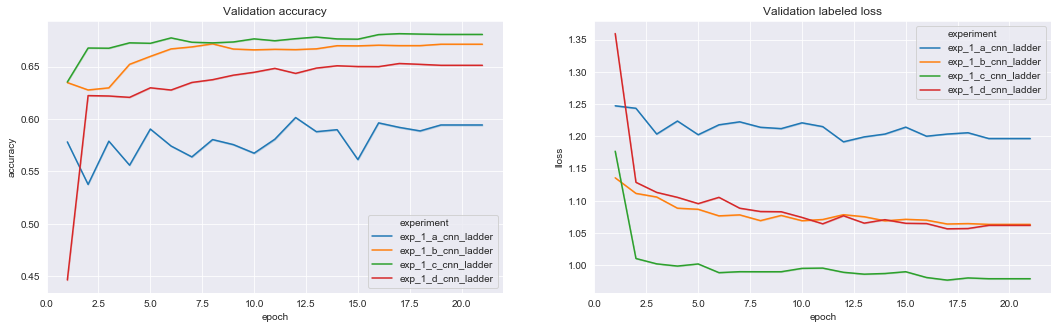

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
sns.set_style('darkgrid')
ax_acc = sns.lineplot(x='epoch', y='accuracy', hue='experiment', 
                      data=results[results.split == 'validation'], ax=ax[0])
ax_acc.set_title('Validation accuracy')
ax_acc.plot()
ax_l = sns.lineplot(x='epoch', y='lloss', hue='experiment', 
                    data=results[results.split == 'validation'], ax=ax[1])
ax_l.set_title('Validation labeled loss')
ax_l.plot()

In [106]:
test_metrics_sample = exp_1_c_cnn_ladder[exp_1_c_cnn_ladder.split == 'test']
test_metrics_sample.accuracy.unique()

array([0.707, 0.638, 0.641, 0.553, 0.72 , 0.733, 0.684, 0.717, 0.672,
       0.692, 0.68 , 0.675, 0.698, 0.71 , 0.711, 0.656, 0.668, 0.651,
       0.67 , 0.612])

In [107]:
print(test_metrics_sample.shape[0] / 1024) # 1024 == batch size
print(len(test_metrics_sample.accuracy.unique()))

19.53125
20


In [108]:
test_acc = test_metrics_sample.accuracy.unique()
np.mean(test_acc)

0.6744

Corramos el experimento 1 c) más épocas y veamos si mejora.

In [109]:
exp_1_c_50_epochs = pd.read_csv('../models/experiments/results_cnn_ladder_exp_1_c_50_epochs.csv')

In [111]:
exp_1_c_50_epochs.head()

,experiment,split,epoch,accuracy,lloss,true,pred
0,exp_1_c_50_epochs_cnn_ladder,training,1,0.573,1.2,3,4
1,exp_1_c_50_epochs_cnn_ladder,training,1,0.573,1.2,3,4
2,exp_1_c_50_epochs_cnn_ladder,training,1,0.573,1.2,1,1
3,exp_1_c_50_epochs_cnn_ladder,training,1,0.573,1.2,4,4
4,exp_1_c_50_epochs_cnn_ladder,training,1,0.573,1.2,0,4


In [112]:
split_group = exp_1_c_50_epochs.groupby('split')
split_group.accuracy.describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,20000.0,0.681459,0.039648,0.566,0.666,0.683,0.713,0.748
training,2903150.0,0.663592,0.023463,0.549,0.651,0.666,0.680,0.726
validation,1000000.0,0.674720,0.025720,0.549,0.660,0.677,0.690,0.737


Mejora un punto de accuracy en test

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

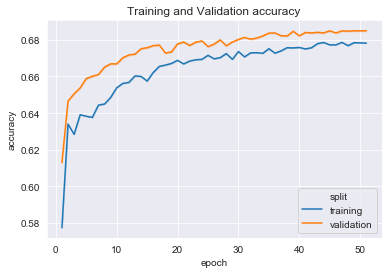

In [119]:
sns.set_style('darkgrid')
train_val_df = exp_1_c_50_epochs[exp_1_c_50_epochs.split.isin(['training', 'validation'])]
ax_acc = sns.lineplot(x='epoch', y='accuracy', hue='split', data=train_val_df)
ax_acc.set_title('Training and Validation accuracy')
ax_acc.plot()

### Conclusiones Experimento 1:

- Tomando un 75% de los datos de entrenamiento como anotados se obtienen los mejores resultados.
- Si bien no se obtiene una accuracy alta, se aprecia la gran capacidad de generalización que posee el modelo.

# Experimento 2

- Se utiliza el mejor caso del experimento 1: 75% de datos de training anotados.
- Se toma a su vez una proporción disjunta de datos no anotados sumada a los 100k utilizados en el experimento 1. Cantidad elegida: 200k datos disjuntos no anotados.
- Verificar si mejora validation agregando mas datos no anotados (i.e. si el modelo generaliza aún más).

Datos:

300000 -> training (100k del experimento 1 + 200k nuevos) 

Se utilizan 75% de los primeros 100k como datos anotados (#datos anotados = 75k)

&nbsp; 20000 -> validation
 
&nbsp; 20000 -> test

# Experimento 3

- Se utiliza el mejor caso del experimento 1: 75% de los 100k de datos de training anotados.
- Todos los datos no anotados deben ser disjuntos a los datos anotados, es decir, no se deben utilizar los datos anotados como no anotados.
- Cantidad elegida: 200k datos disjuntos no anotados.

Datos:

275000 -> training (75k anotados del experimento 1 + 200k nuevos no anotados) 

&nbsp; 20000 -> validation
 
&nbsp; 20000 -> test